<H2><CENTER>Data Preprocessing</CENTER></H2>

**Objective:** 

<P>The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise.By performing effective data preprocessing, the project aims to enhance the quality, reliability
and usefulness of the data for machine learning.</P>

**Dataset:**
https://drive.google.com/file/d/1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_/view?usp=sharing

**Key Components to be fulfilled:**
1.  Data Exploration:
    -   Explore the data, list down the unique values in each feature and find its length.
    -   Perform the statistical analysis and renaming of the columns.
2. Data Cleaning:
    -   Find the missing and inappropriate values, treat them appropriately.
    -   Remove all duplicate rows.
    -   Find the outliers.
    -   Replace the value 0 in age as NaN Treat the null values in all columns using any
    measures(removing/ replace the values with mean/median/mode) .

3. Data Analysis:
    -   Filter the data with age >40 and salary<5000 Plot the chart with age and salaryCount the number of people from each place and represent it visually

4. Data Encoding:
    -   Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.
5. Feature Scaling:
    -   After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [42]:
# Import Necessery Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')


In [43]:
df = pd.read_csv("Employee.csv")

In [44]:
df.head(5)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


### 1.  Data Exploration:



In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


##### 1.1 Explore the data, list down the unique values in each feature and find its length.

In [46]:
# unique values 
unique_val =[df[col].unique() for col in df.columns]
unique_val


[array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
        'Congnizant', 'Infosys Pvt Lmt'], dtype=object),
 array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
        21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
        33., 17.,  0., 54.]),
 array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
        1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
        8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
        9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
        3454., 5654., 5009., 5098., 3033.]),
 array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
        nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
       dtype=object),
 array(['India'], dtype=object),
 array([0, 1])]

In [47]:
#length of the Uniques values of each column
count = [df[col].nunique() for col in df.columns]
count

[6, 29, 40, 11, 1, 2]

In [48]:
summary = pd.DataFrame({
    'Feature': df.columns,
    'Unique Values': [df[col].unique() for col in df.columns],
    'Unique Count': [df[col].nunique() for col in df.columns]
})
summary

,Feature,Unique Values,Unique Count
0,Company,"[TCS, Infosys, CTS, nan, Tata Consultancy Serv...",6
1,Age,"[20.0, 30.0, 35.0, 40.0, 23.0, nan, 34.0, 45.0...",29
2,Salary,"[nan, 2300.0, 3000.0, 4000.0, 5000.0, 6000.0, ...",40
3,Place,"[Chennai, Mumbai, Calcutta, Delhi, Podicherry,...",11
4,Country,[India],1
5,Gender,"[0, 1]",2


#### 1.2 Perform the statistical analysis and renaming of the columns.

In [49]:
# Perform statistical analysis
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [50]:
# Renaming the columns
df.rename(
    columns={
        'Country': 'HQ',
        'Salary' : 'Monthly_Salary',
        'Place' : 'Location',
        'Company' : 'Company_Name'
        
    },inplace=True
)

In [51]:
df.head()

,Company_Name,Age,Monthly_Salary,Location,HQ,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


### 2. Data Cleaning:

#### 2.1 Find the missing and inappropriate values, treat them appropriately.

In [52]:
# find the missing Value 
df.isnull().sum()

Company_Name       8
Age               18
Monthly_Salary    24
Location          14
HQ                 0
Gender             0
dtype: int64

In [53]:
#Replace the value 0 in age as NaN
df['Age'].replace(0, np.nan, inplace=True)

In [54]:
# Treat the null values in all columns
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Monthly_Salary'].fillna(df['Monthly_Salary'].median(),inplace=True)

In [55]:
# For categorical columns, use mode
df['Location'].fillna(df['Location'].mode()[0],inplace=True)
df['Company_Name'] = df['Company_Name'].fillna('Other')

In [56]:
df.isnull().sum()

Company_Name      0
Age               0
Monthly_Salary    0
Location          0
HQ                0
Gender            0
dtype: int64

##### 2.2 Remove all duplicate rows.

In [57]:
print("Data Before removing Duplicates : ",df.shape)

Data Before removing Duplicates :  (148, 6)


In [58]:
#Remove all duplicate rows
df.drop_duplicates(inplace=True)

In [59]:
print("Data After removing Duplicates : ",df.shape)

Data After removing Duplicates :  (144, 6)


#### 2.3 Find the outliers.

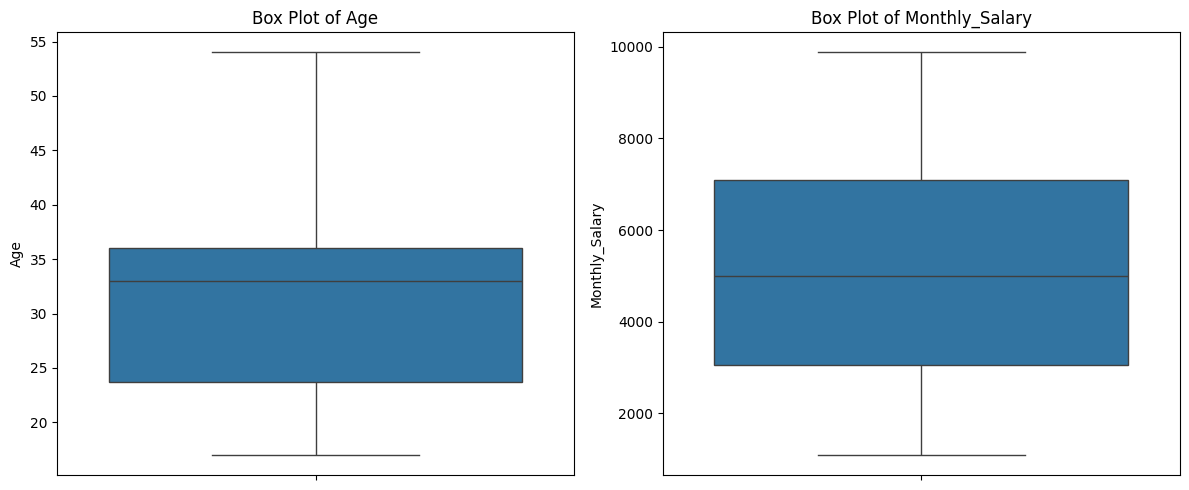

In [63]:
#Find the outliers.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sn.boxplot(y=df['Age'])
plt.title("Box Plot of Age")

plt.subplot(1,2,2)
sn.boxplot(y=df['Monthly_Salary'])
plt.title("Box Plot of Monthly_Salary")

plt.tight_layout()
plt.show()

In [91]:
# Outlier detection (using IQR method)
Q1 = df['Monthly_Salary'].quantile(0.25)
Q3 = df['Monthly_Salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Monthly_Salary'] < (Q1 - 1.5 * IQR)) | (df['Monthly_Salary'] > (Q3 + 1.5 * IQR))]
print("Outliers:\n", outliers)

Outliers:
 Empty DataFrame
Columns: [Company_Name, Age, Monthly_Salary, Location, HQ, Gender]
Index: []


### 3. Data Analysis

#### 3.1 Filter the data with age >40 and salary<5000 Plot the chart with age and salary Count the number of people from each place and represent it visually

In [69]:
Data_Analysis = df[(df['Age'] > 40) & (df['Monthly_Salary'] < 5000)]
Data_Analysis

,Company_Name,Age,Monthly_Salary,Location,HQ,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


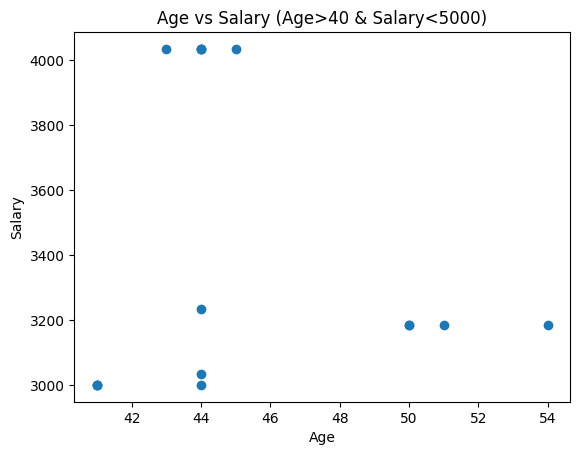

In [78]:
#Plot the chart with age and salary
plt.scatter(Data_Analysis['Age'], Data_Analysis['Monthly_Salary'])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary (Age>40 & Salary<5000)")
plt.show()

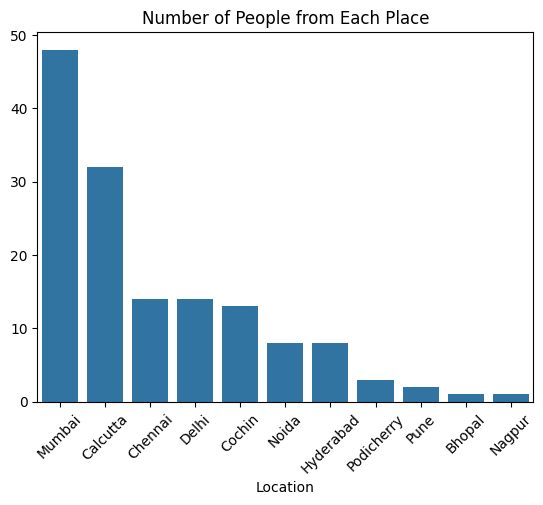

In [79]:
# Count number of people from each place
place_count = df['Location'].value_counts()
sn.barplot(x=place_count.index, y=place_count.values)
plt.title("Number of People from Each Place")
plt.xticks(rotation=45)
plt.show()

### 4. Data Encoding

#### 4.1 Convert categorical variables into numerical representations using techniques Such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [82]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [83]:
# Label Encoding for categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


In [84]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.head())

   Company_Name   Age  Monthly_Salary  Location  HQ  Gender
0             5  20.0          5000.0         2   0       0
1             2  30.0          5000.0         6   0       0
2             5  35.0          2300.0         1   0       0
3             2  40.0          3000.0         4   0       0
4             5  23.0          4000.0         6   0       0


### 5. Feature Scaling

#### After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [86]:
# StandardScaler
scaler = StandardScaler()
scaled_std = scaler.fit_transform(df_encoded)

In [90]:
print("Standard Scaler Output:\n", scaled_std[:5])

Standard Scaler Output:
 [[ 1.10286908 -1.48467637 -0.10082748 -0.89325451  0.         -0.53452248]
 [-0.37675652 -0.26717411 -0.10082748  0.7505621   0.         -0.53452248]
 [ 1.10286908  0.34157702 -1.2437349  -1.30420866  0.         -0.53452248]
 [-0.37675652  0.95032816 -0.94742557 -0.07134621  0.         -0.53452248]
 [ 1.10286908 -1.11942569 -0.52412653  0.7505621   0.         -0.53452248]]


In [87]:
# MinMaxScaler
minmax = MinMaxScaler()
scaled_mm = minmax.fit_transform(df_encoded)


In [89]:
print("MinMax Scaler Output:\n", scaled_mm[:5])

MinMax Scaler Output:
 [[0.83333333 0.08108108 0.44508934 0.2        0.         0.        ]
 [0.33333333 0.35135135 0.44508934 0.6        0.         0.        ]
 [0.83333333 0.48648649 0.13781723 0.1        0.         0.        ]
 [0.33333333 0.62162162 0.21748037 0.4        0.         0.        ]
 [0.83333333 0.16216216 0.33128485 0.6        0.         0.        ]]
